# Assignment # 9 : Analysis Of College Major In US.
## Data Science 350

In this assignment I am analysing published data on "US College Majors" to ascertain employment and salary patterns across different majors available to students.

## About the data set

This data set is from the [Five Thirty Eight](https://github.com/rudeboybert/fivethirtyeight/tree/master/data-raw/college-majors).

- **Source**:
As per the information on above link, this data has been created from American Community Survey 2010-2012 Public Use Microdata Series.

## Load & examine the data set.

The function(Loaddata.R)shown below loads three different files to data frames. Herein I am also sourcing another function "ZScoreNormalise.R" which I am using to normalise various columns in the file.
Make sure you have the **.csv file** in your working directory!.

In [22]:
rm(list=ls())
# Clear Console:
cat("\014")
library(dplyr)
library(repr)
source('Loaddata.R')
source('ZScoreNormalise.R')
# Load and cleanse the csv file.
allages = Loaddata('all-ages.csv')
gradstudents = Loaddata('grad-students.csv')
recentgrads = Loaddata('recent-grads.csv')

We now look at the data structure of the loaded file and give a cursory look to the structure.

In [18]:
str((recentgrads))

'data.frame':	172 obs. of  21 variables:
 $ Rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code          : int  2419 2416 2415 2417 2405 2418 6202 5001 2414 2408 ...
 $ Major               : chr  "PETROLEUM ENGINEERING" "MINING AND MINERAL ENGINEERING" "METALLURGICAL ENGINEERING" "NAVAL ARCHITECTURE AND MARINE ENGINEERING" ...
 $ Major_category      : chr  "Engineering" "Engineering" "Engineering" "Engineering" ...
 $ Total               : int  2339 756 856 1258 32260 2573 3777 1792 91227 81527 ...
 $ Sample_size         : int  36 7 3 16 289 17 51 10 1029 631 ...
 $ Men                 : int  2057 679 725 1123 21239 2200 832 2110 12953 8407 ...
 $ Women               : int  282 77 131 135 11021 373 960 1667 2105 6548 ...
 $ ShareWomen          : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed            : int  1976 640 648 758 25694 1857 2912 1526 76442 61928 ...
 $ Full_time           : int  1849 556 558 1069 23170 2038 2924 1085 71298 55450 ...
 $ Part_time          

## Normalize key columns used in analysis.
I am now calling the custom "ZScoreNormalise" function to normalise columms from "grad-students.csv" and "recent-grads.csv" files. I then go onto use mutate function from dplyr package to add normlaized columns back in the loaded data frames.

In [23]:
#z-Score Normalization of grad median income data
df_gradstudent_median <- ZScoreNormalise(gradstudents$Grad_median)
#z-Score Normalization of recent grad mediam income data
df_recent_gradstudent_median <- ZScoreNormalise(recentgrads$Median)
gradstudents = mutate(gradstudents,normalized_gradmedian = df_gradstudent_median$normalized_logColumn)
recentgrads = mutate(recentgrads,normalized_gradmedian_round = round(df_recent_gradstudent_median$normalized_logColumn),normalized_gradmedian = df_recent_gradstudent_median$normalized_logColumn)

#z-Score Normalization of grad unemployment rate data
df_gradstudent_unemployment <- ZScoreNormalise(gradstudents$Grad_unemployment_rate)
#z-Score Normalization of recent grad unemployment data
df_recent_gradstudent_unemployment <- ZScoreNormalise(recentgrads$Unemployment_rate)
gradstudents = mutate(gradstudents,normalized_gradunemployment = round(df_gradstudent_unemployment$normalized_logColumn))
recentgrads = mutate(recentgrads,normalized_gradundemploymentrate = round(df_recent_gradstudent_unemployment$normalized_logColumn))

#z-Score Normalization of recent grad employment and unemployment data
df_recent_gradstudent_unemployednum <- ZScoreNormalise(recentgrads$Unemployed)
df_recent_gradstudent_employednum <- ZScoreNormalise(recentgrads$Employed)
#Add normalized unemployment and employment numbers to the recent graduate data frame.
recentgrads = mutate(recentgrads,normalized_gradunemployednum = round(df_recent_gradstudent_unemployednum$normalized_logColumn),normalized_grademployednum = round(df_recent_gradstudent_employednum$normalized_logColumn))


## Group Data By Key Columns across Major Category
    I am now trying to get key metrics (mean) of median pay and unemployment rate across major categories.

In [24]:
#Group data by median pay by major category
Recent_Graduate_GroupbyMajorCategorybyMedian <-
  recentgrads %>% group_by(Major_category) %>% summarise(normalized_gradmedian = mean(normalized_gradmedian))

#Group data by employment rate by major category
Recent_Graduate_GroupbyMajor_unemploymentrate <-
  recentgrads %>% group_by(Major_category) %>% summarise(normalized_gradundemploymentrate = mean(normalized_gradundemploymentrate))

### Numeric conversion for Major Category
I am now allocating a numeric value to each major category which I will be using in later part of the notebook.

Observe data type of column "Major_category_n".

In [25]:
#Convert Categorical variables(Major Category) into numeric
recentgrads$Major_category_n <- as.numeric(factor(recentgrads$Major_category , levels=Recent_Graduate_GroupbyMajor_unemploymentrate$Major_category))
str(recentgrads)

'data.frame':	172 obs. of  27 variables:
 $ Rank                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code                      : int  2419 2416 2415 2417 2405 2418 6202 5001 2414 2408 ...
 $ Major                           : chr  "PETROLEUM ENGINEERING" "MINING AND MINERAL ENGINEERING" "METALLURGICAL ENGINEERING" "NAVAL ARCHITECTURE AND MARINE ENGINEERING" ...
 $ Major_category                  : chr  "Engineering" "Engineering" "Engineering" "Engineering" ...
 $ Total                           : int  2339 756 856 1258 32260 2573 3777 1792 91227 81527 ...
 $ Sample_size                     : int  36 7 3 16 289 17 51 10 1029 631 ...
 $ Men                             : int  2057 679 725 1123 21239 2200 832 2110 12953 8407 ...
 $ Women                           : int  282 77 131 135 11021 373 960 1667 2105 6548 ...
 $ ShareWomen                      : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed                        : int  1976 640 648 758 25694 1857 2912 1526 764

## Create data frame with only numeric features.

I am now going to create a data frame with all numeric features so I can calcuate the following of all such features in one go.
        - Summary.
        - Covariance.
        - Correlation.

In [26]:
#Retain numeric variables in the data frame
numeric_recentgrads1 <- data.frame(recentgrads[sapply(recentgrads,is.numeric)])
numeric_recentgrads <- data.frame(lapply(numeric_recentgrads1, as.numeric))
str(numeric_recentgrads)

#All the columns are num or integer hence we can calculate the summary of the complete dataset
lapply(numeric_recentgrads, summary)
# Frequency Tables.
table(numeric_recentgrads$Major_category_n)
#Calculate covariance.
cov(numeric_recentgrads)
#Calculate the Pearson's correlation of between numeric attributes.
cor(numeric_recentgrads)

'data.frame':	172 obs. of  25 variables:
 $ Rank                            : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Major_code                      : num  2419 2416 2415 2417 2405 ...
 $ Total                           : num  2339 756 856 1258 32260 ...
 $ Sample_size                     : num  36 7 3 16 289 ...
 $ Men                             : num  2057 679 725 1123 21239 ...
 $ Women                           : num  282 77 131 135 11021 ...
 $ ShareWomen                      : num  0.121 0.102 0.153 0.107 0.342 ...
 $ Employed                        : num  1976 640 648 758 25694 ...
 $ Full_time                       : num  1849 556 558 1069 23170 ...
 $ Part_time                       : num  270 170 133 150 5180 ...
 $ Full_time_year_round            : num  1207 388 340 692 16697 ...
 $ Unemployed                      : num  37 85 16 40 1672 ...
 $ Unemployment_rate               : num  0.0184 0.1172 0.0241 0.0501 0.0611 ...
 $ Median                          : num  110000 75000 7300

$Rank
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   43.75   87.50   87.08  130.20  173.00 

$Major_code
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1100    2403    3608    3880    5503    6403 

$Total
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    609    4560   15100   39390   38910  393700 

$Sample_size
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    42.0   131.0   358.1   339.0  4212.0 

$Men
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    2178    5434   16720   14630  173800 

$Women
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1852    8386   22650   22550  307100 

$ShareWomen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3360  0.5396  0.5231  0.7033  0.9690 

$Employed
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    559    3735   12030   31370   31700  307900 

$Full_time
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    488    3181   10070   26180   25450  251500 

$Part_time
   Min. 1st Qu.


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 
10  8 14 13  4 11 16 29 12 15  6  1  5 10  9  9 

,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,normalized_gradmedian,normalized_gradundemploymentrate,normalized_gradunemployednum,normalized_grademployednum,Major_category_n
Rank,2.522176e+03,9.213143e+03,2.360459e+05,2.376219e+02,-8.479121e+04,4.173724e+05,7.577426e+00,1.782353e+05,7.301280e+04,1.418762e+05,...,-6.036526e+05,5.554130e+04,1.723892e+05,7.070150e+04,-4.629869e+01,-4.386829e+01,1.424691e+00,6.473684e+00,6.772372e+00,1.095002e+01
Major_code,9.213143e+03,2.865132e+06,2.152817e+07,2.166933e+05,1.752468e+06,3.360033e+06,2.872270e+01,1.727052e+07,1.449942e+07,4.849552e+06,...,-2.398079e+06,1.483955e+06,9.380528e+06,2.654423e+06,-2.689080e+02,-2.980406e+02,2.055710e+02,4.028129e+02,3.518963e+02,2.252355e+03
Total,2.360459e+05,2.152817e+07,4.028313e+09,3.718309e+07,4.666856e+08,1.252311e+09,7.693770e+02,3.209902e+09,2.696848e+09,8.850833e+08,...,-8.503182e+07,1.084123e+09,1.424014e+09,4.131826e+08,-8.041916e+03,-6.982867e+03,4.665008e+03,6.197253e+04,6.265733e+04,-2.134544e+02
Sample_size,2.376219e+02,2.166933e+05,3.718309e+07,3.838773e+05,3.019064e+06,8.691361e+06,1.745223e+00,3.033399e+07,2.603421e+07,7.496541e+06,...,-5.405640e+05,9.270676e+06,1.351827e+07,3.708269e+06,-3.553291e+01,-4.193713e+01,2.945240e+01,5.712164e+02,5.981469e+02,-1.505043e+02
Men,-8.479121e+04,1.752468e+06,4.666856e+08,3.019064e+06,7.908571e+08,7.766743e+08,-7.413401e+02,3.323457e+08,2.789987e+08,1.105749e+08,...,1.273078e+07,1.287434e+08,1.246709e+08,4.171915e+07,6.201528e+02,6.298477e+02,3.779337e+03,7.573743e+03,6.204935e+03,1.318596e+04
Women,4.173724e+05,3.360033e+06,1.252311e+09,8.691361e+06,7.766743e+08,1.685413e+09,2.809019e+03,9.647258e+08,7.545094e+08,3.338085e+08,...,-1.052033e+08,5.350672e+08,3.505233e+08,1.208185e+08,-8.661969e+03,-7.612486e+03,1.817788e+03,1.773568e+04,1.855033e+04,1.798495e+04
ShareWomen,7.577426e+00,2.872270e+01,7.693770e+02,1.745223e+00,-7.413401e+02,2.809019e+03,5.342361e-02,6.446723e+02,3.143200e+02,3.828458e+02,...,-1.920141e+03,7.399200e+02,2.228910e+02,1.209588e+02,-1.515175e-01,-1.421563e-01,-9.384887e-03,2.008110e-03,1.504430e-02,3.322636e-02
Employed,1.782353e+05,1.727052e+07,3.209902e+09,3.033399e+07,3.323457e+08,9.647258e+08,6.446723e+02,2.577250e+09,2.171275e+09,6.961330e+08,...,-6.863611e+07,8.636084e+08,1.139005e+09,3.275257e+08,-6.152784e+03,-5.468267e+03,3.075119e+03,4.918202e+04,5.036747e+04,-1.901265e+03
Full_time,7.301280e+04,1.449942e+07,2.696848e+09,2.603421e+07,2.789987e+08,7.545094e+08,3.143200e+02,2.171275e+09,1.844603e+09,5.676785e+08,...,-4.357876e+07,7.076437e+08,9.551910e+08,2.703884e+08,-3.849819e+03,-3.538669e+03,2.406316e+03,4.128787e+04,4.254872e+04,-3.277673e+03
Part_time,1.418762e+05,4.849552e+06,8.850833e+08,7.496541e+06,1.105749e+08,3.338085e+08,3.828458e+02,6.961330e+08,5.676785e+08,2.153651e+08,...,-3.534638e+07,2.519880e+08,3.181484e+08,9.717274e+07,-3.291168e+03,-2.793787e+03,1.469265e+03,1.386107e+04,1.344048e+04,2.978635e+03


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,normalized_gradmedian_round,normalized_gradmedian,normalized_gradundemploymentrate,normalized_gradunemployednum,normalized_grademployednum,Major_category_n
Rank,1.000000000,0.10837967,0.0740537862,0.007636643,-0.06003634,0.20243375,0.652780896,0.069908142,0.03385009,0.19250155,...,-0.805416136,0.051821588,0.144000661,0.202299609,-0.86331294,-0.87350019,0.02713807,0.121021086,0.12759719,0.0514099213
Major_code,0.108379672,1.00000000,0.2003886989,0.206622151,0.03681534,0.04835239,0.073415267,0.200980922,0.19944670,0.19522780,...,-0.094931892,0.041080026,0.232486082,0.225347036,-0.14877113,-0.17607719,0.11618111,0.223423165,0.19671179,0.3137502712
Total,0.074053786,0.20038870,1.0000000000,0.945556829,0.26146511,0.48061522,0.052445835,0.996212283,0.98933511,0.95024338,...,-0.089771970,0.800385557,0.941227859,0.935480010,-0.11865476,-0.11002014,0.07031321,0.916716018,0.93411044,-0.0007929819
Sample_size,0.007636643,0.20662215,0.9455568290,1.000000000,0.17327147,0.34169478,0.012186758,0.964395221,0.97835565,0.82447417,...,-0.058461749,0.701128320,0.915307031,0.860060617,-0.05370588,-0.06768657,0.04547478,0.865568852,0.91348128,-0.0572759510
Men,-0.060036336,0.03681534,0.2614651137,0.173271466,1.00000000,0.67272370,-0.114051727,0.232789177,0.23099447,0.26792907,...,0.030333805,0.214515253,0.185976541,0.213177075,0.02065080,0.02239683,0.12856202,0.252847533,0.20877390,0.1105560274
Women,0.202433746,0.04835239,0.4806152194,0.341694782,0.67272370,1.00000000,0.296029427,0.462884266,0.42791742,0.55405968,...,-0.171710542,0.610713352,0.358183579,0.422896803,-0.19758348,-0.18542715,0.04235806,0.405594251,0.42754941,0.1032941595
ShareWomen,0.652780896,0.07341527,0.0524458352,0.012186758,-0.11405173,0.29602943,1.000000000,0.054940691,0.03166313,0.11286769,...,-0.556656730,0.150003186,0.040454611,0.075201255,-0.61387987,-0.61503467,-0.03884262,0.008156769,0.06158761,0.0338950161
Employed,0.069908142,0.20098092,0.9962122825,0.964395221,0.23278918,0.46288427,0.054940691,1.000000000,0.99582939,0.93438594,...,-0.090593137,0.797114894,0.941216392,0.927088380,-0.11349602,-0.10771382,0.05794685,0.909547220,0.93877135,-0.0088304741
Full_time,0.033850089,0.19944670,0.9893351148,0.978355646,0.23099447,0.42791742,0.031663129,0.995829393,1.00000000,0.90066504,...,-0.067989873,0.772050048,0.932997978,0.904670844,-0.08394136,-0.08239265,0.05359783,0.902543557,0.93739571,-0.0179942496
Part_time,0.192501553,0.19522780,0.9502433836,0.824474172,0.26792907,0.55405968,0.112867693,0.934385938,0.90066504,1.00000000,...,-0.161390590,0.804589888,0.909461032,0.951504609,-0.21001467,-0.19037313,0.09577639,0.886760410,0.86659311,0.0478574136


# Standard visualization on key features.
I am now going to present various plots to visually show relationships between key features.

    - Bar plot across median pay gives you a clear sense of very high low paying jobs and very few high paying jobs.
    - Bar plot across major category shows a high numbers of majors in "Engineering" category anf way fewer majors in "comminications and Journalism"
    - Box plot across major category and unemployment rate shows high unempolement in "Arts", "Computers & Mathematics" & "Social Science"
    - Box plot between major category and median pay shows "Engineering" commands othe highest median pay and "Arts", "Education", "Humanities & Libearl Arts" and "Psycology & Social Work" with the lowest median pay.
    - A 2d kernel density plot between unemployment and median pay shows least unemployment with highest and lowset paying jobs and highest unemployment with average paying jobs.
    - A violin plot between meidan pay and major category shows good paying jobs in "Engineering" across the scale, "Arts" on the other hand has a fat bulb on the lower of the median pay, this would translate into a lot of jobs in the 25th quantile and fewer jobs in higher quantile.
    - A scatter matric of all three features (Major Category, Median Pay and Unemployment Rate).

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

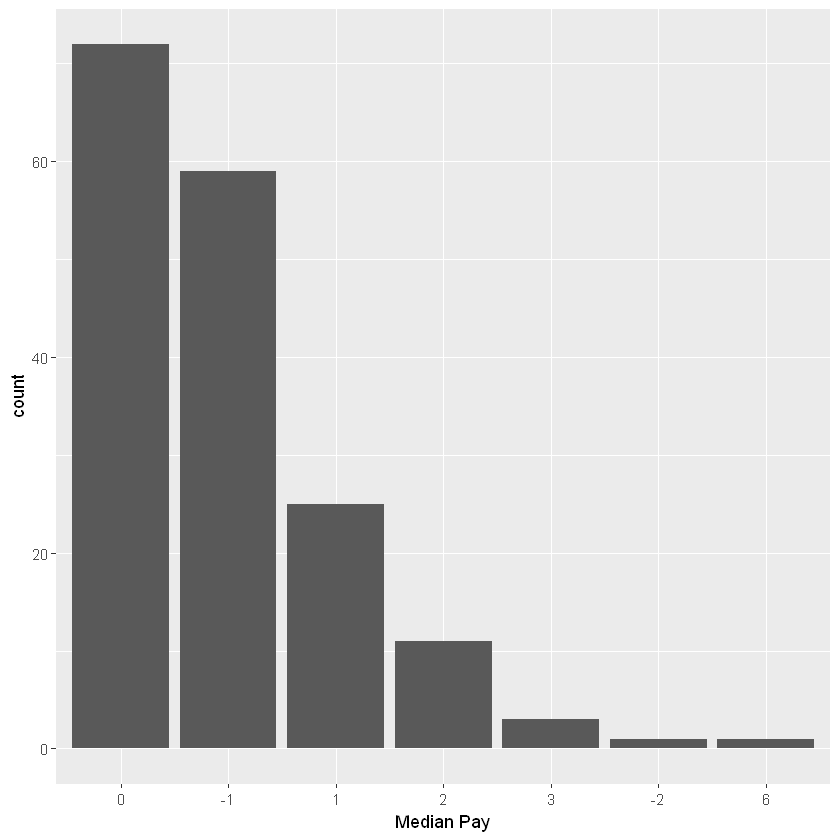

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

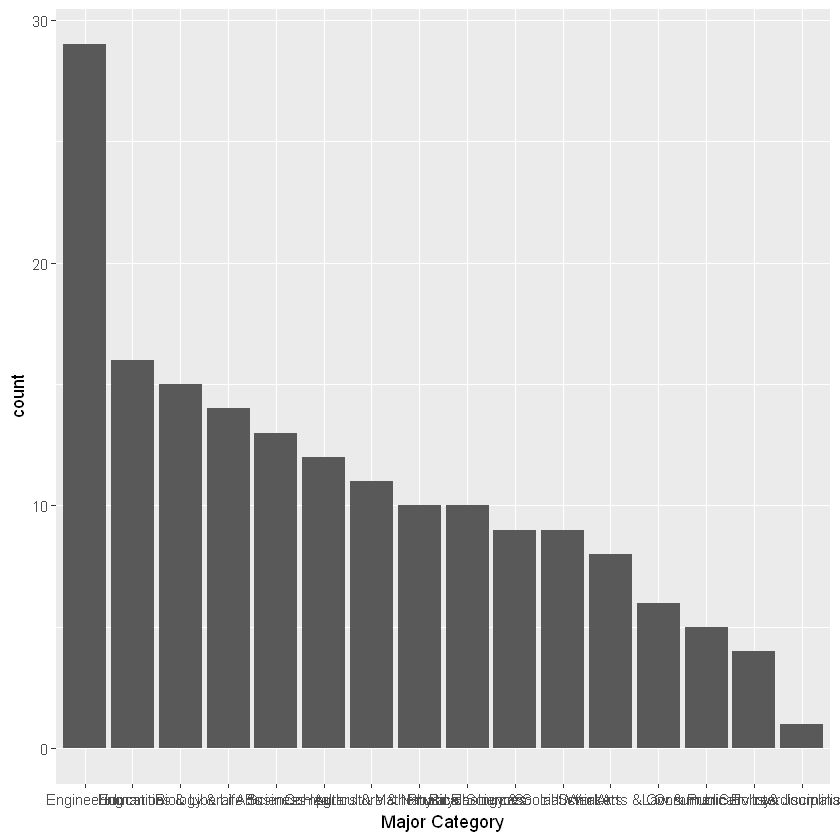

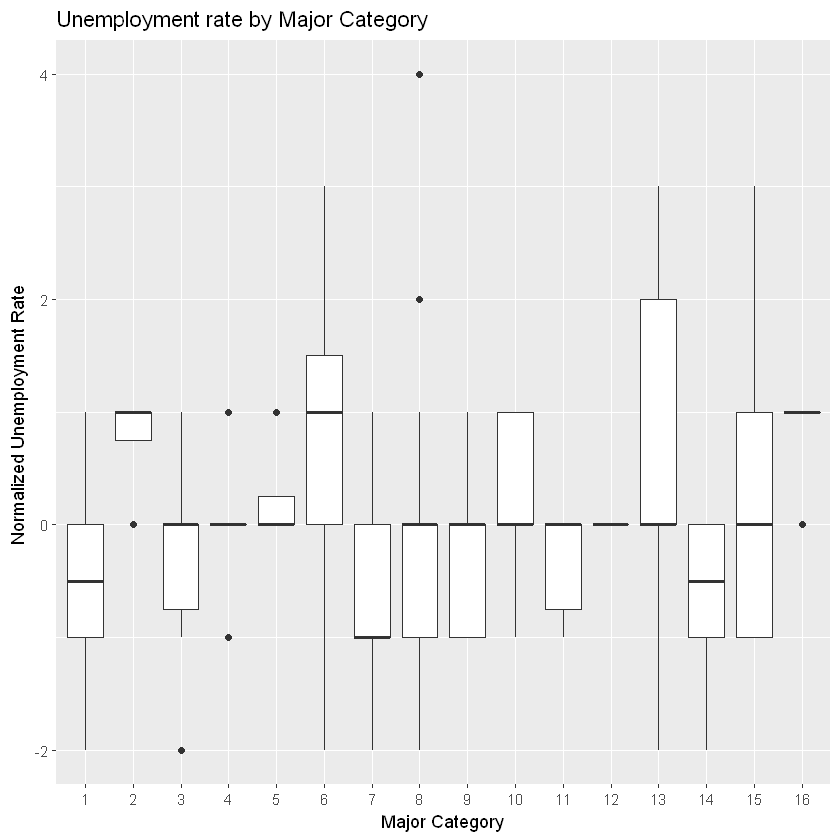

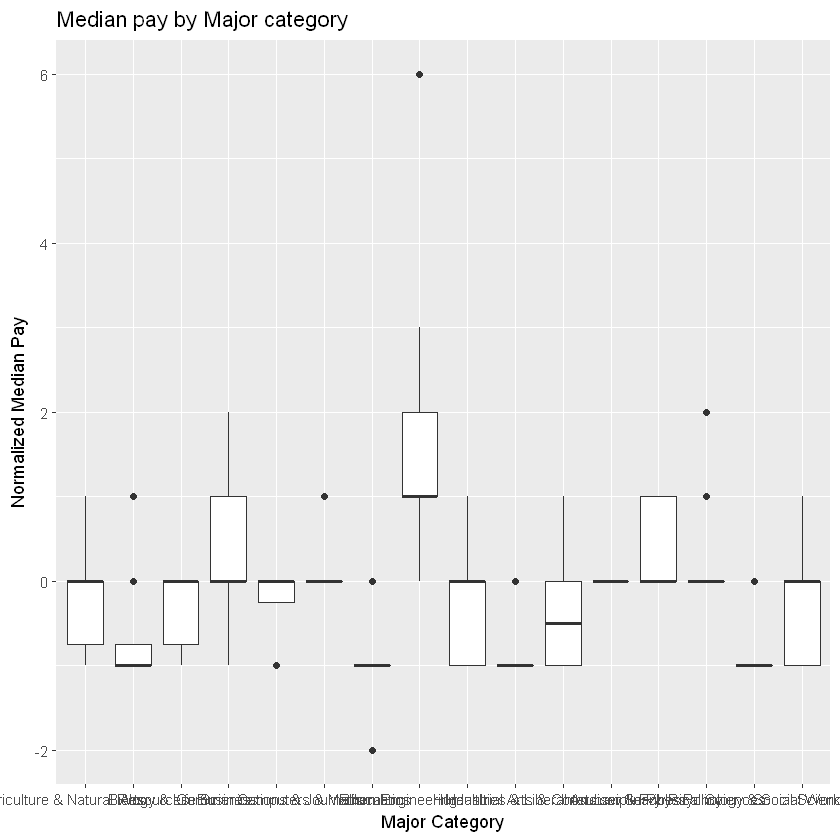

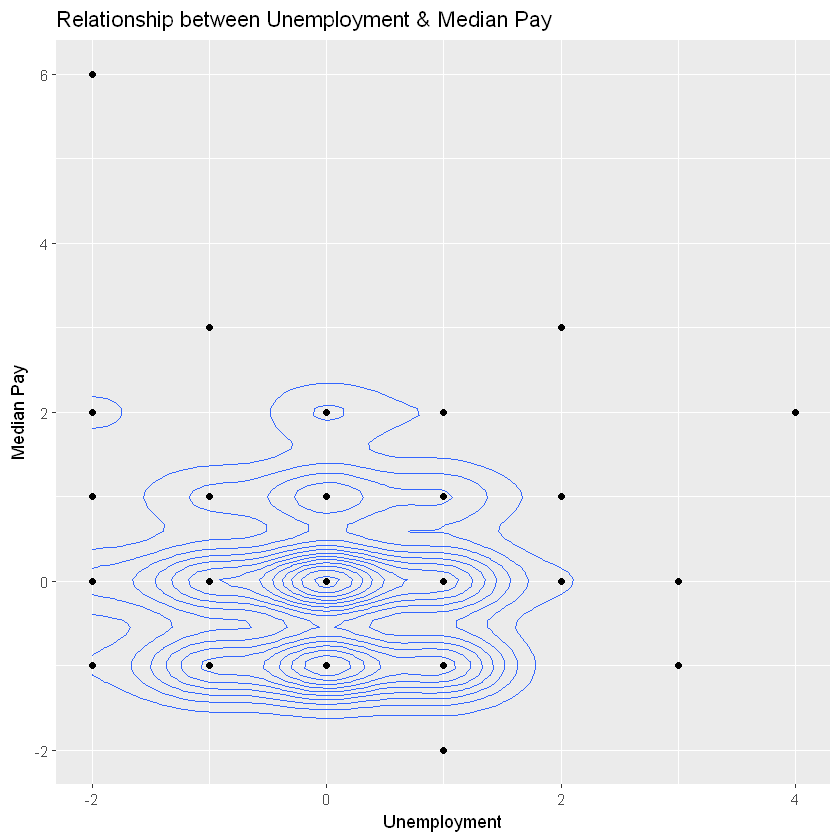

Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.2"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



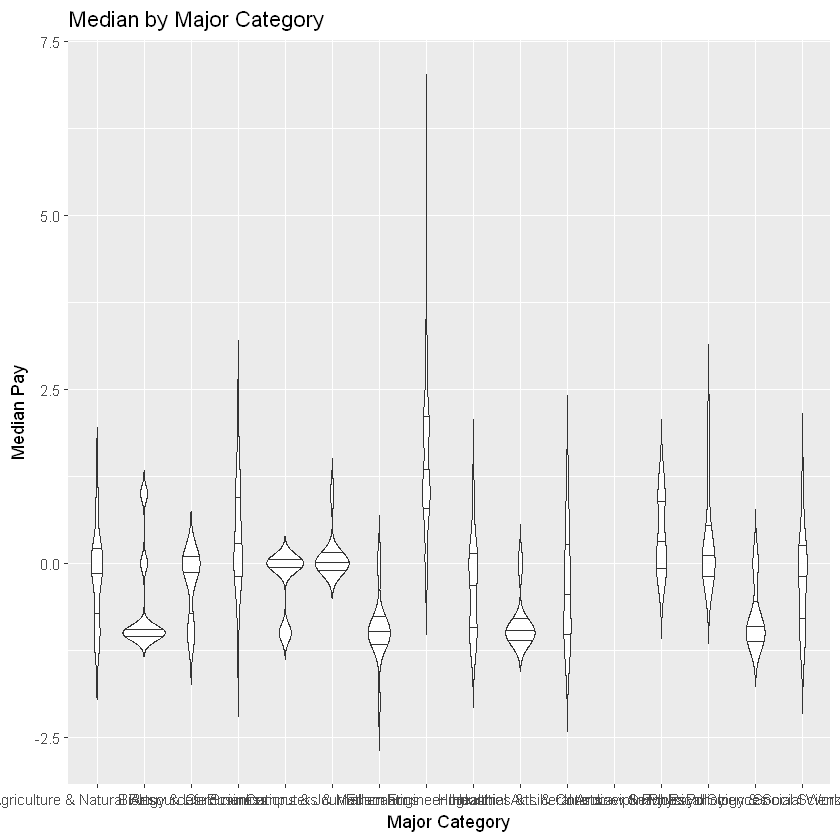

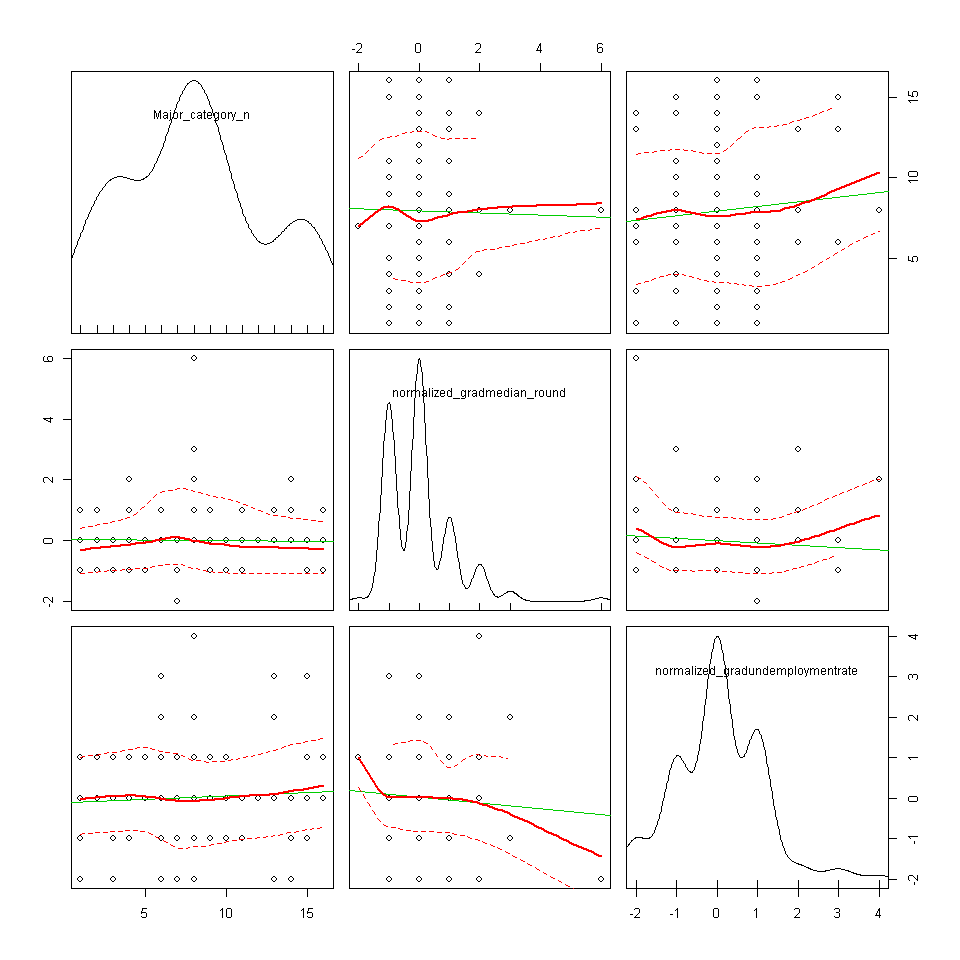

In [27]:
#Visualization
require(ggplot2)
# Bar plot
ggplot(recentgrads, aes(x=reorder(normalized_gradmedian_round,normalized_gradmedian_round, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Median Pay')
theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Bar plot
ggplot(recentgrads, aes(x=reorder(Major_category,Major_category, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Major Category')
theme(axis.text.x = element_text(angle = 90, hjust = 1))

#Create boxplot to compare two variables.
ggplot(numeric_recentgrads, aes(x = factor(Major_category_n), y = normalized_gradundemploymentrate)) + geom_boxplot() + 
         xlab('Major Category') + ylab('Normalized Unemployment Rate ') + ggtitle('Unemployment rate by Major Category')

#Create boxplot to compare two variables.
#Engineering s the top grosser as a category.
ggplot(recentgrads, aes(x = factor(Major_category), y = normalized_gradmedian_round)) + geom_boxplot() + 
  xlab('Major Category') + ylab('Normalized Median Pay') + ggtitle('Median pay by Major category')

#2D kernel density plot
ggplot(recentgrads, aes(normalized_gradundemploymentrate, normalized_gradmedian_round)) + geom_point() + 
  geom_density2d() +
  xlab('Unemployment') + ylab('Median Pay') +
  ggtitle('Relationship between Unemployment & Median Pay')

# Violin Plot
ggplot(recentgrads, aes(x = factor(Major_category), y = normalized_gradmedian_round)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Major Category')  + ylab('Median Pay') + ggtitle('Median by Major Category')

#Scatter plot matrix
options(repr.plot.width=8, repr.plot.height=8)
require(car)
scatterplotMatrix(~ Major_category_n + normalized_gradmedian_round + normalized_gradundemploymentrate, data = recentgrads)

Standard deviation of **Heating.Load and Cooling.Load** are way off from their respective means, this would convey a skewed distribution.

### Examine the data frames

Next, we can look the first and last few lines of the data frame using the `head` and `tail` functions. Execute the code in the cells below to examine the first and last few rows of the data frame.

In [32]:
head(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
3,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
5,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
6,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
8,0.90,563.5,318.5,122.50,7,4,0,0,20.71,25.16
9,0.90,563.5,318.5,122.50,7,5,0,0,19.68,29.60


In [33]:
tail(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
764,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
765,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
766,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
767,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
768,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
769,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


### Frequency tables

The summary techniques we have used so far are suitable only for numeric variables. Categorical variables have values which are typically unordered. Therefore, we need a method to summrize categorical based on counts.

**Overall.Height** has a numeric datatype, data however in this column is static and can be used as a categorical variable.

The R `table` function lets you look create a fequency table. The frequency table shows the count of each category of the variable. Execute the following code to show the number of houses with different overall height.

In [34]:
table(Cleansedenergy.ff$Overall.Height)


3.5   7 
384 382 

Notice that overall height of 3.5 and 7 is equally distributed in the dataset.

You can also look at the frequency of a combination of two categorical variables. To see an example, execute the code in the cell below and examine the results.

In [35]:
table(Cleansedenergy.ff$Overall.Height, Cleansedenergy.ff$Orientation)

     
       2  3  4  5
  3.5 96 96 96 96
  7   95 95 96 96

Notice that orientation of 2,3,4 & 5 is equally distributed across overall height of 3.5 & 7.

### Covariance and correlation

Now, you will work with the correlations between the numberic variables.  Covariance is defined as follows:

$$cov(x,y) = E((x - \mu_x) (y - \mu_y))$$

Pearson correlation is similar to covariance, but with normalization by the variance, and is defined as follows: 

$$cor(x,y) = \frac{E((x - \mu_x) (y - \mu_y))}{\sigma_x \sigma_y}$$

There are also non-parametric measures of correlation. One of widely used non-parametric method is Kendal's rank correlation. The Kendal correlation counts the number of values which have the same sign (concordant) and with the oposite sign (discordant). As a rank or non-parametric method, Kendal correlation is robust to outliers. Kendal's rank correlation can be computed as follows:

$$\tau = \frac{\Sigma concordant\ pairs - \Sigma disconcordant\ pairs}{n(n-1)/2}$$

Execute the code in the cell below to compute the Pearson correltion for a subset of the data frame. 

In [36]:
#Calculate covariance between numeric attributes.
cov(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,0.0111329026,-9.2025042,-9.359227e-01,-4.13329077,1.529189e-01,0.0005131828,0.0001080223,0.001296268,0.6679585,0.6407800
Surface.Area,-9.2025042066,7731.7165976,7.482090e+02,3491.75378462,-1.321076e+02,-0.3798819092,-0.0815286950,-0.978344340,-587.9824567,-565.9994198
Wall.Area,-0.9359226608,748.2090283,1.907460e+03,-579.62552923,2.157776e+01,-0.0481228349,-0.0075257257,-0.090308708,200.8940070,177.6262497
Roof.Area,-4.1332907729,3491.7537846,-5.796255e+02,2035.68965693,-7.684268e+01,-0.1658795372,-0.0370014847,-0.444017816,-394.4382319,-371.8128347
Overall.Height,0.1529189235,-132.1075923,2.157776e+01,-76.84267650,3.066482e+00,0.0045871090,0.0010751037,0.012901244,15.7741895,14.9676744
Orientation,0.0005131828,-0.3798819,-4.812283e-02,-0.16587954,4.587109e-03,1.2516271609,-0.0006143450,-0.007372139,-0.0431036,0.1466053
Glazing.Area,0.0001080223,-0.0815287,-7.525726e-03,-0.03700148,1.075104e-03,-0.0006143450,0.0176501305,0.042389802,0.3613385,0.2629154
Glazing.Area.Distribution,0.0012962679,-0.9783443,-9.030871e-02,-0.44401782,1.290124e-02,-0.0073721395,0.0423898019,2.391030564,1.3428022,0.7383466
Heating.Load,0.6679585054,-587.9824567,2.008940e+02,-394.43823186,1.577419e+01,-0.0431036025,0.3613385245,1.342802164,102.0175023,93.8910330
Cooling.Load,0.6407800253,-565.9994198,1.776262e+02,-371.81283473,1.496767e+01,0.1466052834,0.2629153723,0.738346559,93.8910330,90.7248878


Next, compute the correlation matrix by execting the code in the cell below. 

In [37]:
#Calculate the Pearson's correlation of between numeric attributes.
cor(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,1.000000000,-0.991890787,-0.203099114,-0.868232360,0.827631081,0.004347408,0.007706112,0.007945075,0.62676962,0.63759006
Surface.Area,-0.991890787,1.000000000,0.194830637,0.880136160,-0.857965014,-0.003861652,-0.006979086,-0.007195504,-0.66204737,-0.67579473
Wall.Area,-0.203099114,0.194830637,1.000000000,-0.294146707,0.282135937,-0.000984886,-0.001297020,-0.001337240,0.45540931,0.42698852
Roof.Area,-0.868232360,0.880136160,-0.294146707,1.000000000,-0.972582526,-0.003286242,-0.006172902,-0.006364321,-0.86553747,-0.86517781
Overall.Height,0.827631081,-0.857965014,0.282135937,-0.972582526,1.000000000,0.002341431,0.004621215,0.004764516,0.89184519,0.89736861
Orientation,0.004347408,-0.003861652,-0.000984886,-0.003286242,0.002341431,1.000000000,-0.004133337,-0.004261510,-0.00381451,0.01375780
Glazing.Area,0.007706112,-0.006979086,-0.001297020,-0.006172902,0.004621215,-0.004133337,1.000000000,0.206345433,0.26927930,0.20776807
Glazing.Area.Distribution,0.007945075,-0.007195504,-0.001337240,-0.006364321,0.004764516,-0.004261510,0.206345433,1.000000000,0.08597697,0.05013078
Heating.Load,0.626769618,-0.662047366,0.455409314,-0.865537473,0.891845190,-0.003814510,0.269279296,0.085976968,1.00000000,0.97594098
Cooling.Load,0.637590064,-0.675794733,0.426988518,-0.865177810,0.897368606,0.013757797,0.207768067,0.050130781,0.97594098,1.00000000


The covariance is a bit hard to interpret since the variables are not normalized. The numberic ranges of the variables are quite different, leading to a large range of covariance values. 

The correlation matrix is a bit easier to understand, since there is a normalization of the values. The diagonal values of the correlation matrix are all 1.0, as a result of the normalization. The magnituges of the correlation values between the variables exhibit a significant range. 

Some pairs of variables are weakly correlated, with small magnitudes. For example, **Orientation** and **Heating.load** have no relationship while **Overall.Height** and **Heating.Load** are strongly correlated and **Wall.Area** and **Heating.Load** are moderately correlated.

### Bar plots

Bar plots are used to display the counts or fequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable. 

The code below uses ggplot2 to create the bar plot. The `ggplot` function defines the data frame and the x and y column(s) to be plotted. The plot type is defined by these function `geom_bar`. The `+` operator chains the functions. 

Execute this code to create the bar plot.

List of 1
 $ axis.text.x:List of 10
  ..$ family    : NULL
  ..$ face      : NULL
  ..$ colour    : NULL
  ..$ size      : NULL
  ..$ hjust     : num 1
  ..$ vjust     : NULL
  ..$ angle     : num 90
  ..$ lineheight: NULL
  ..$ margin    : NULL
  ..$ debug     : NULL
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

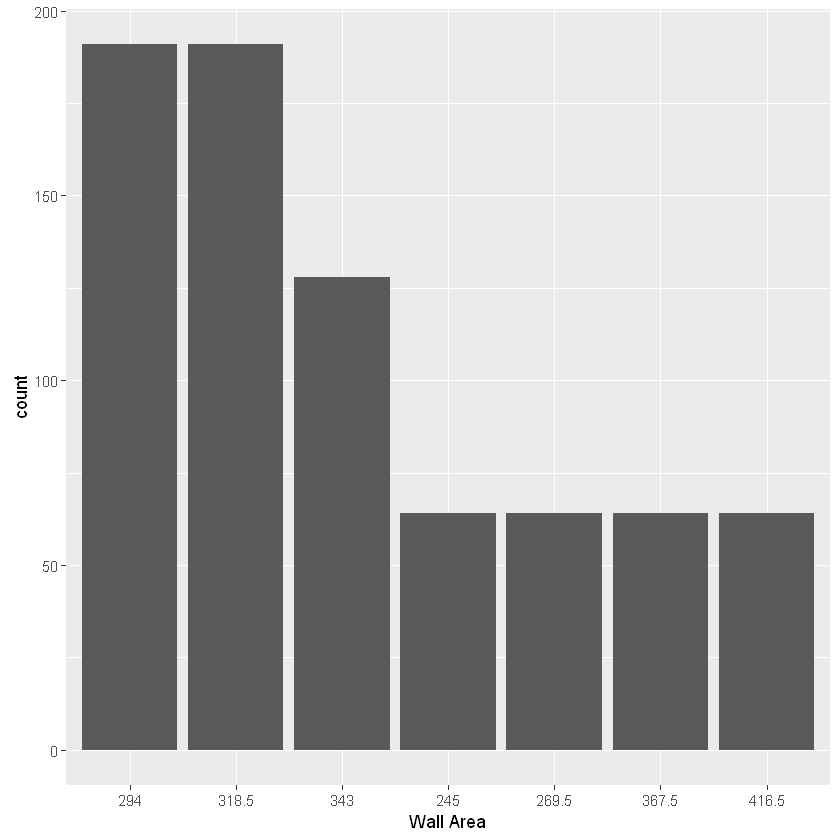

In [38]:
require(ggplot2)
ggplot(Cleansedenergy.ff, aes(x=reorder(Wall.Area,Wall.Area, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Wall Area')
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) ## Theme function for conrol

Bar plot clearly shows you that wall area between 294 & 318.5 is most prevalent in the homes.

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

Execute the code in the cell below to create a histogram using the `geom_histogram` function. 

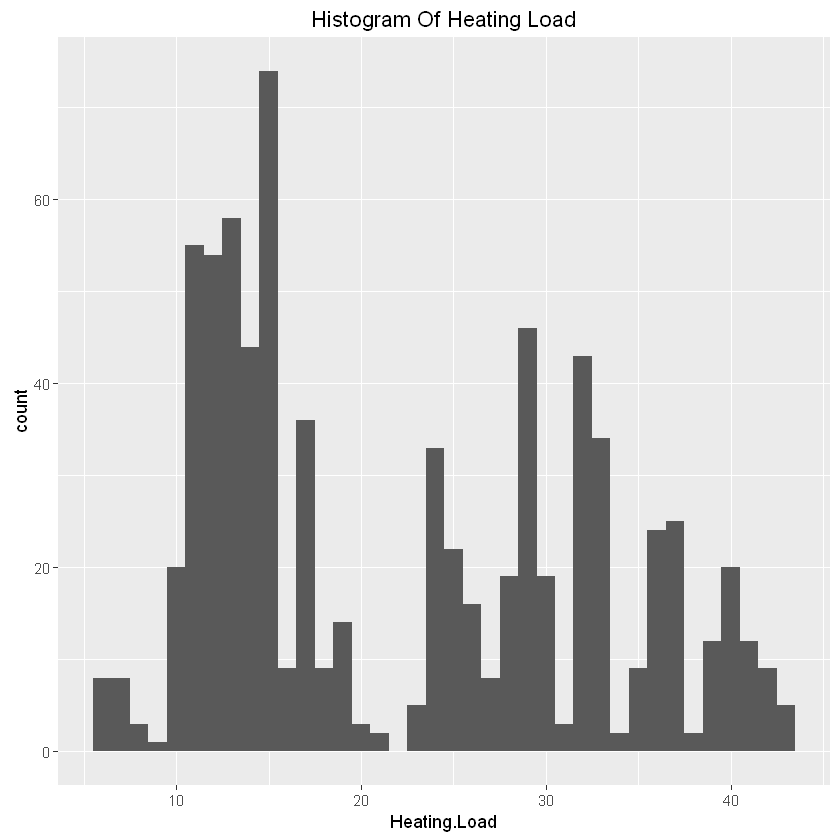

In [39]:
ggplot(Cleansedenergy.ff, aes(Heating.Load)) + geom_histogram(binwidth = 1) + 
  ggtitle('Histogram Of Heating Load')

The histogram shows Heating.Load with a positive skewed distribution.

### Box plots

Box plots, also known as box and wisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

A diagram showing the interpretation of a box plot is shown in the figure below.

![Interpretation of a box plot](BoxPlot.png)

On a box plot the median value is shown with a dark bar. The inner two qartiles of data values are contained within the 'box'. The 'wiskers' enclose the majority of the data, at +/-1.5 times the inter-quartile range. Outliers are shown by symbols beyond the wiskers.

Several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

Execute the code in the cell below to create a box plot of the price of the automobiles.

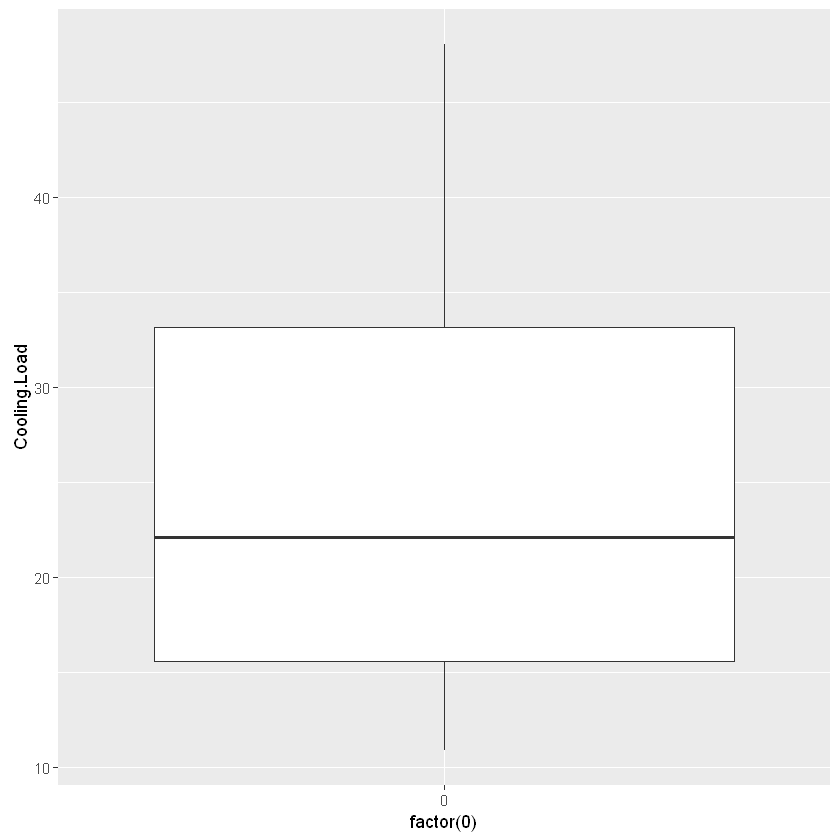

In [40]:
ggplot(Cleansedenergy.ff, aes(x = factor(0), y = Cooling.Load )) + geom_boxplot()

Box plots are most useful when the data are subdivided using another variable. In ggolot2 the you can add an x variable of **Overall Height** factor to perform this group by operation. Execute the code below to display the box plots of `Cooling.Load` grouped by the `Overall.Height` variable.

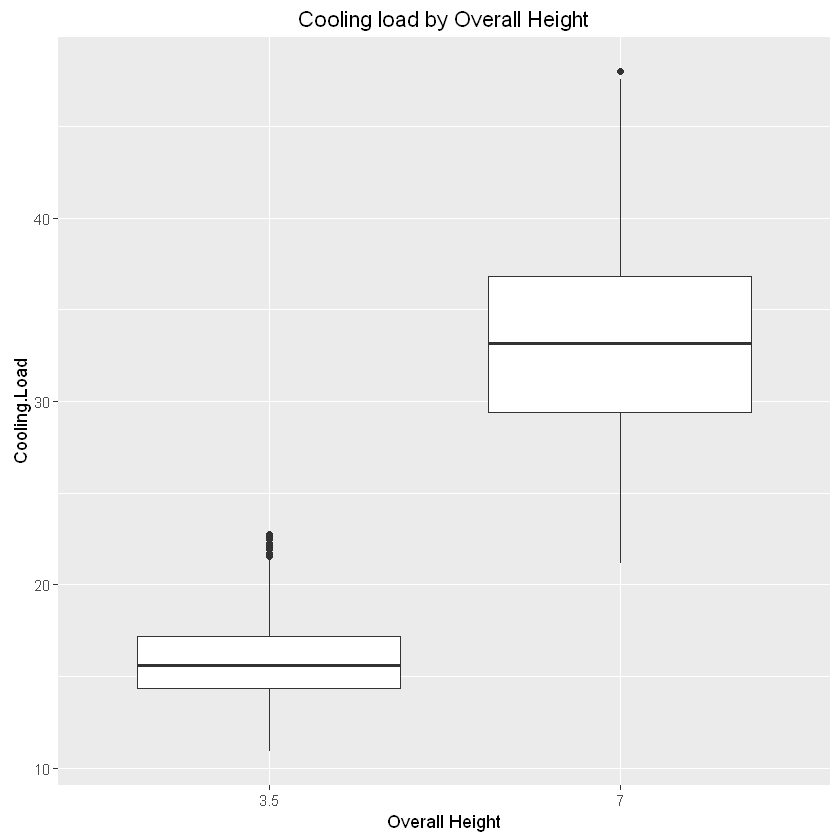

In [41]:
#Create boxplot to compare two variables.
ggplot(Cleansedenergy.ff, aes(x = factor(Overall.Height), y = Cooling.Load)) + geom_boxplot() + 
  xlab('Overall Height') + ggtitle('Cooling load by Overall Height')

Examine these box plots and note the following:

- The median cooling load of a overall height of 3.5 is considerably less than overall height of 7.
- Overall Height of 3.5 has a lot more outliers as compared to 7 when grouped by cooling load.
- There is no overlap between the interquartile ranges of cooling load distributions of overall height of 3.5 & 7, this would convey that overall height of the house has a strong effect on the cooling load as cooling numbers are dramatically going up with the overall height.

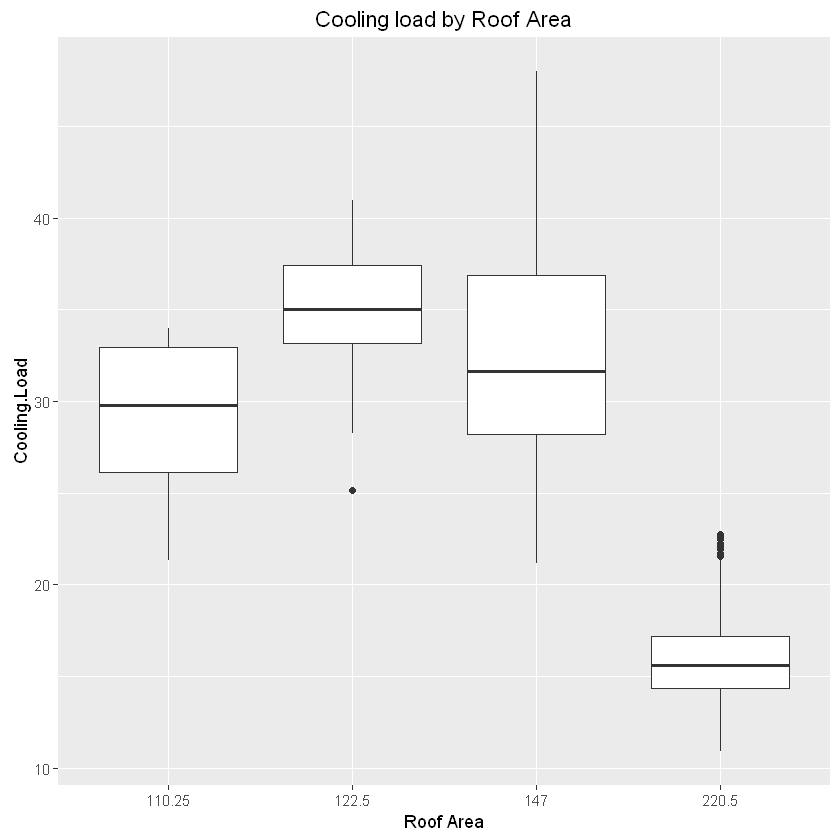

In [42]:
ggplot(Cleansedenergy.ff, aes(x = factor(Roof.Area), y = Cooling.Load)) + geom_boxplot() + 
  xlab('Roof Area') + ggtitle('Cooling load by Roof Area')

One can see that Roof Area has a negative correlation with cooling loads.

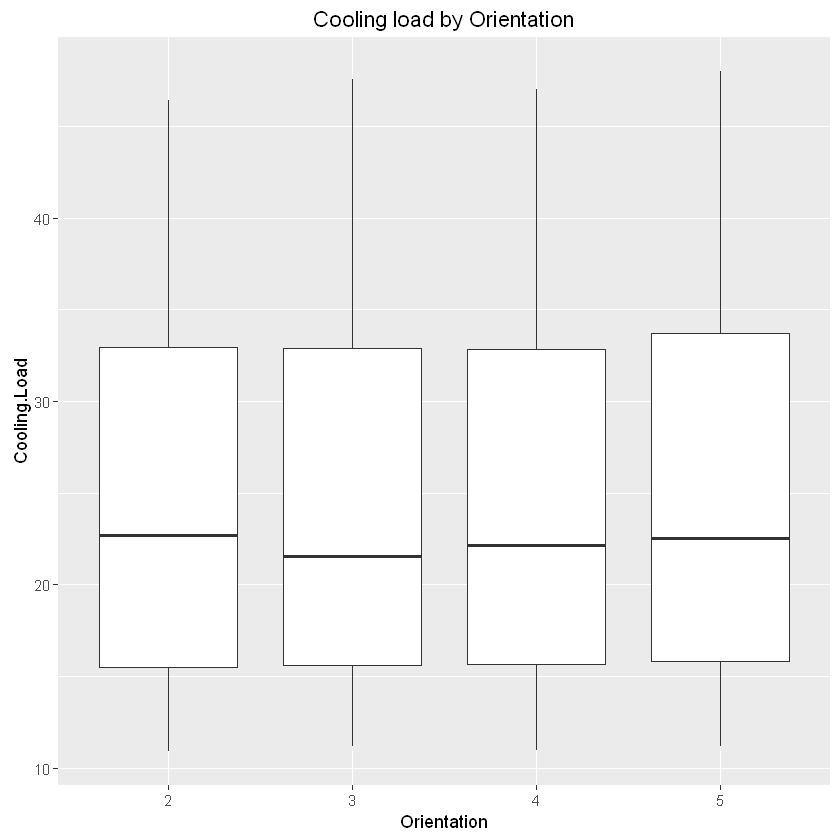

In [43]:
ggplot(Cleansedenergy.ff, aes(x = factor(Orientation), y = Cooling.Load)) + geom_boxplot() + 
  xlab('Orientation') + ggtitle('Cooling load by Orientation')

One can clearly see that Orientation has no correlation with cooling loads.

### Kernel density estimation plots

You have used two methods for visualizing distributions. Now, you will look at another method, kernel density estimation. Kernel density estimation uses a moving denisty kernel to average the density of the distribution. Execute the code in the cell below to compute and plot a kernel density estimate of auto price. 

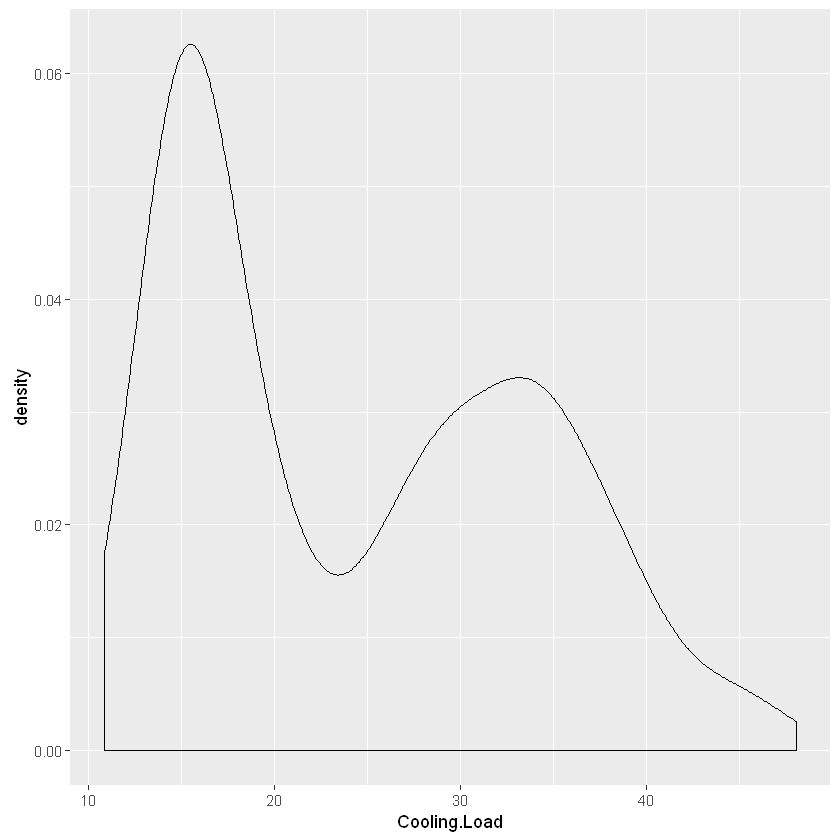

In [44]:
ggplot(Cleansedenergy.ff, aes(Cooling.Load )) + geom_density()

Notice that the distribution is heavily skewed to the left with a small blip in the middle and then going down on the right.

### Violin plots

Violine plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernal density plot and the box plot. The violin plot shows a pair of symetric kernel density plot. Like a box plot, the violin plot can be conditioned on a categorical (factor) variable. 

The code in the cell below creates a violin plot of cooling load, grouped by overall height. Some attributes have been added to show quantiles with the `draw_quantiles` attribute. Additionally, the `trim` attribute adds wiskers to show outliers. Execute this code to create the plot. 

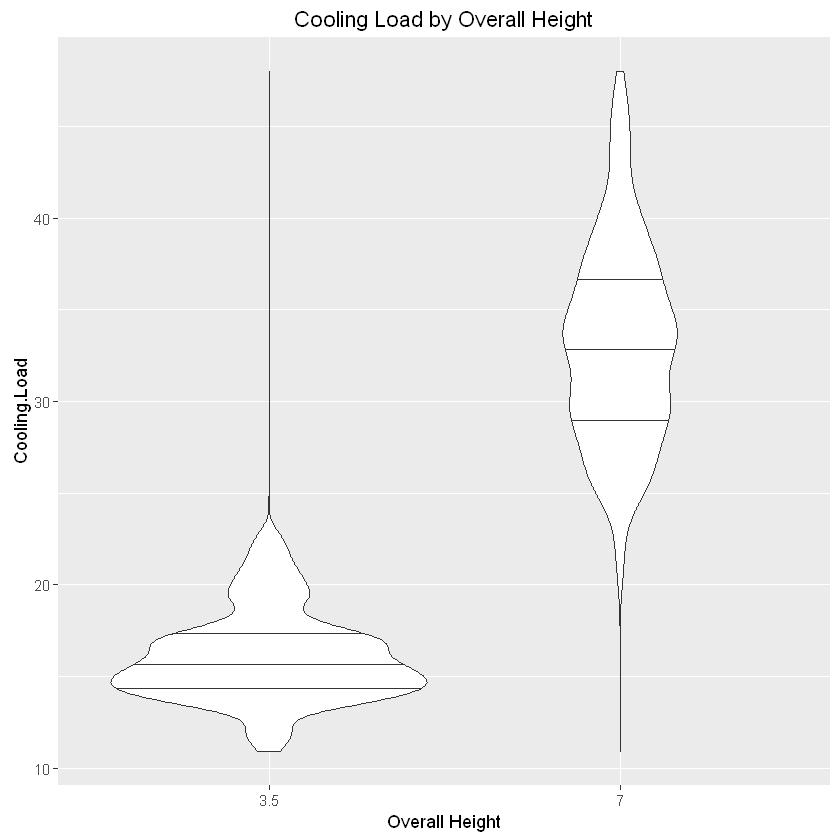

In [45]:
ggplot(Cleansedenergy.ff, aes(x = factor(Overall.Height), y = Cooling.Load)) + 
    geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Overall Height')  + ggtitle('Cooling Load by Overall Height')

This plot clearly shows a thick spread of **Cooling.Load** on the 1st quartile of 3.5 and then goes onto to show a fair share of outliers beyond the 3rd quartile, one can also validate an even spread **Cooling.Load** between 1st and 3rd quartile of 7, with no outliers. 

**One would have however expected to see atleast one outlier beyound 3rd Quartile on 7 as seen on the previous bar plot.** 

`This would be a question to the professor.`

Given below is a violin plot between cooling load and orientation, we would expect to see no meaningful relationship in this plot.

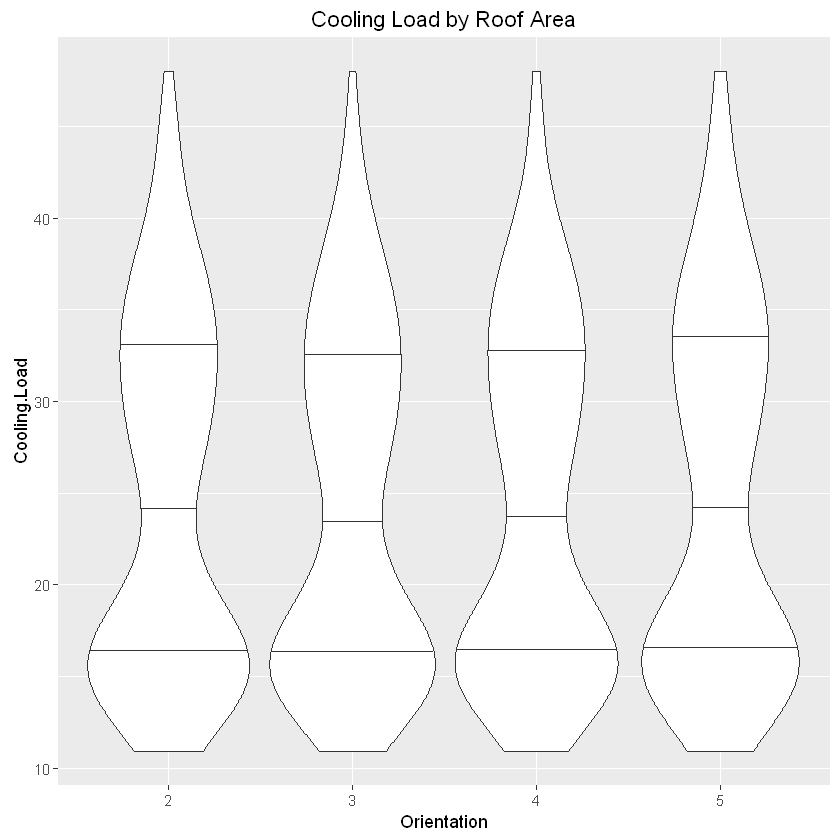

In [46]:
ggplot(Cleansedenergy.ff, aes(x = factor(Orientation), y = Cooling.Load)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Orientation')  + ggtitle('Cooling Load by Roof Area')

As you can see above orientation has no bearing on cooling load.

## Scatter plots

A basic scatter plot shows the relationship between two variables. Points are ploted at the x-y coordinates of each value pair. 

Execute the code in the cell below to create a scatter plot of `Overall.Height` on the horizontal axis vs. `Cooling.Load` on the vertical axis. 

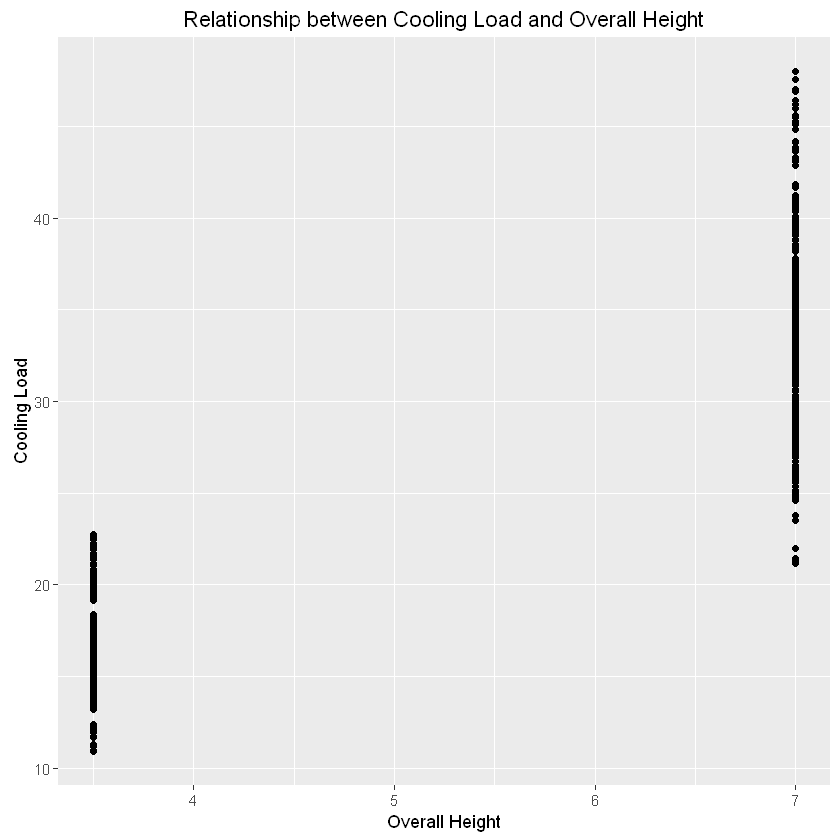

In [47]:
ggplot(Cleansedenergy.ff, aes(x = Overall.Height, y = Cooling.Load)) + geom_point() + 
    xlab('Overall Height') + ylab('Cooling Load') + 
    ggtitle('Relationship between Cooling Load and Overall Height')

The scatter plot shows the relationship between Cooling Load and Overall Height. The relationship clearly shows a higher cooling load for homes with a higher overall height.

### 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. A useful application is to overlay the 2D kernel density plot on a scatter plot. Execute the code below to create the plot.

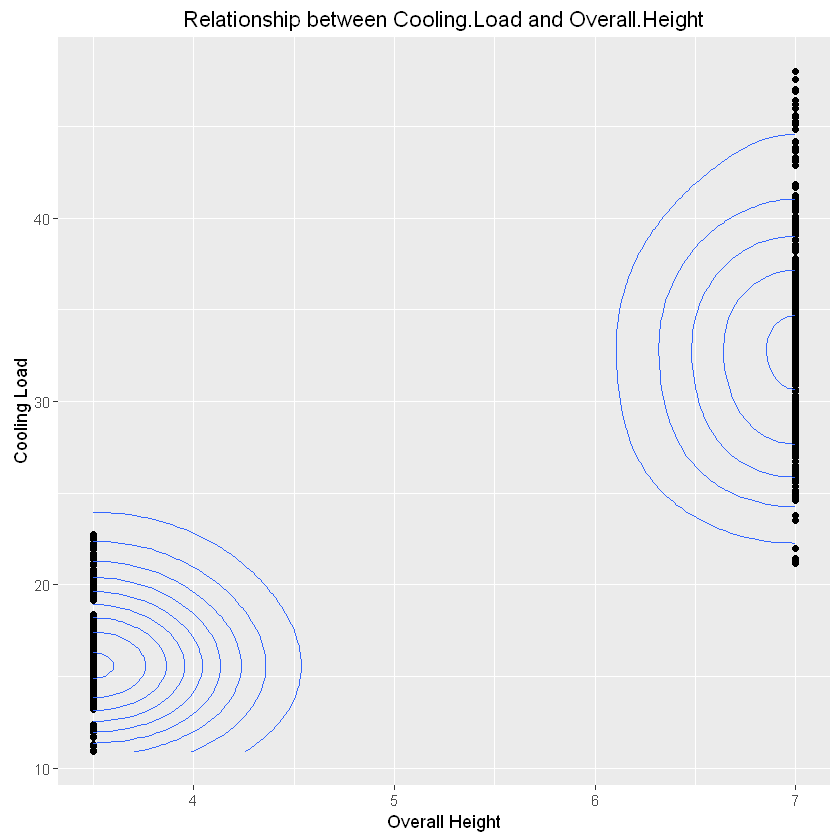

In [48]:
ggplot(Cleansedenergy.ff, aes(Overall.Height, Cooling.Load)) + geom_point() + 
    geom_density2d() +
    xlab('Overall Height') + ylab('Cooling Load') +
    ggtitle('Relationship between Cooling.Load and Overall.Height')

The 2D kernel density estimate is shown using contours in this case. Other options are available. 

The groups of outliers are very prominent.